# Part II - Flights Trend in JAN 2025
## by (Ezzudin Tomizi)

## Investigation Overview


> The goal of our presentation is to thoroughly explore and explain the flight trends and customer behavior observed at JAN throughout the year 2025. By gaining a deeper understanding of these patterns, we aim to provide valuable insights that will support more effective customization of flight schedules, pricing, and promotional offers. Ultimately, this will help airline companies better cater to their customers’ needs and preferences, leading to improved user satisfaction and a more competitive position in the market.

> In this presentation, we will seek to answer key questions that will help identify where faults occur and deepen our understanding of customer behavior. This approach will enable us to pinpoint problem areas while gaining valuable insights into passenger patterns and preferences.

> The key Questions is:
* Which days of the week have the most flight delays?
* What are the most common reasons for flight cancellations?
* How does flight distance relate cancellation likelihood?
* How does passenger travel behavior vary across different days of the week in January?
* Is there a noticeable pattern between flight distance and the number of flights scheduled in January?


## Dataset Overview

> This extensive dataset compiles detailed information on flight travels within the USA specifically for January 2025. It comprises a total of 539,747 individual flight records across 23 distinct columns, offering a comprehensive view of various aspects of air transportation during this period.

In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [38]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data.csv')

## (Visualization 1) How does passenger travel behavior vary across different days of the week in January?

> The following bar chart provides valuable insight into user behavior, revealing an increasing trend in flight activity as the weekend approaches. This suggests that more passengers tend to travel on Thursdays, Fridays, and Sundays, likely due to weekend plans or leisure travel.


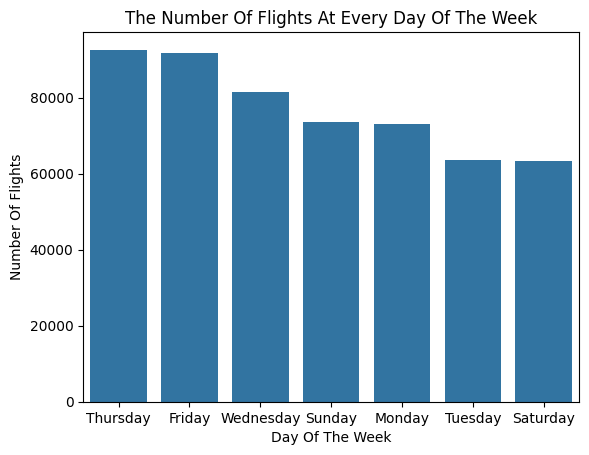

In [39]:
sb.countplot(data=df,x="DAY_OF_WEEK",order=df['DAY_OF_WEEK'].value_counts().index);
plt.title("The Number Of Flights At Every Day Of The Week");
plt.xlabel("Day Of The Week");
plt.ylabel("Number Of Flights");

## (Visualization 2) Is there a noticeable pattern between flight distance and the number of flights scheduled in January?

> The histogram, which represents the number of flights across various distance ranges, indicates that the majority of flights at JAN in 2025 were short-distance. Most of these flights fell within the 0 to 1000-mile range, suggesting that JAN primarily served regional or nearby destinations during that period.


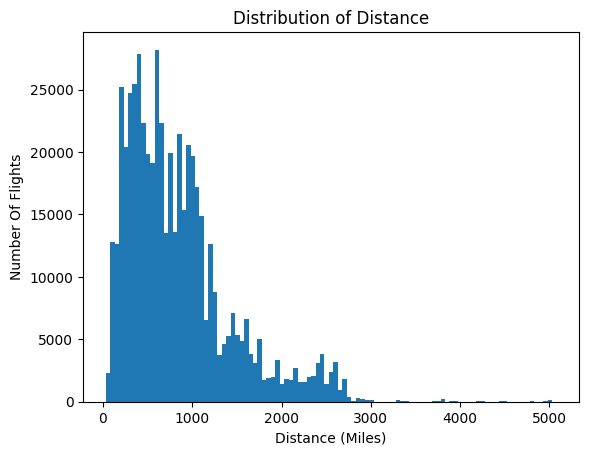

In [29]:
bins = np.arange(df['DISTANCE'].min(),df['DISTANCE'].max()+0.5,50)
plt.hist(data=df,x="DISTANCE",bins=bins);
plt.title("Distribution of Distance");
plt.xlabel("Distance (Miles)");
plt.ylabel("Number Of Flights");

## (Visualization 3) What are the most common reasons for flight cancellations?




the data shows that **around 14,000 flights** have been canceled, **with the primary reason being adverse weather conditions in the JAN area.** Weather-related disruptions appear to play a significant role in the operational challenges at this airport.

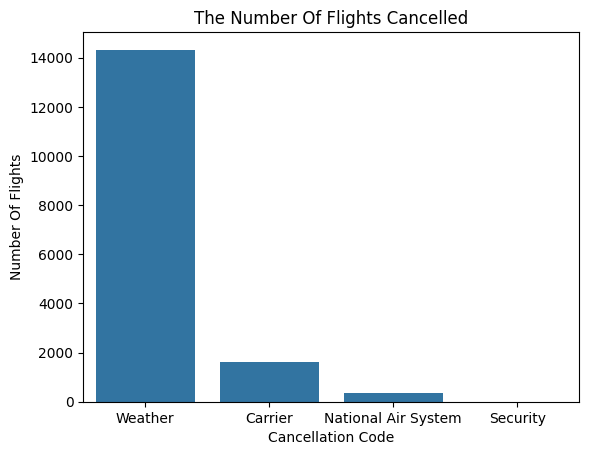

In [35]:
sb.countplot(data=df,x="CANCELLATION_CODE",order=df['CANCELLATION_CODE'].value_counts().index);
plt.title("The Number Of Flights Cancelled");
plt.xlabel("Cancellation Code");
plt.ylabel("Number Of Flights");

## (Visualization 4) Which days of the week have the most flight delays?

The bar chart below indicates **that departure delays tend to increase on Fridays and Sundays**, while they are at their lowest on Tuesdays and Wednesdays. This pattern suggests **a correlation between higher passenger traffic toward the weekend and increased delays**, whereas midweek days experience fewer disruptions and smoother operations.

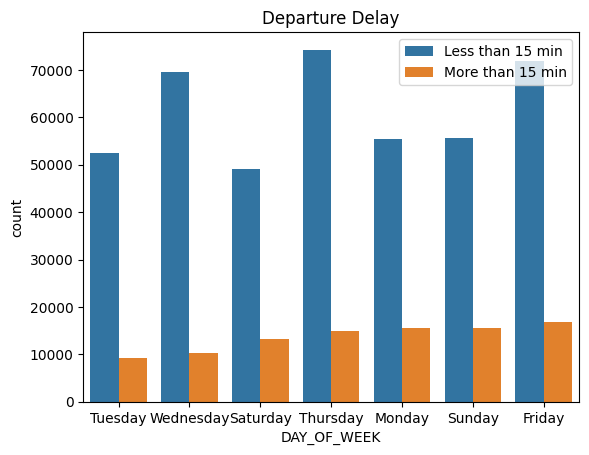

In [36]:
sb.countplot(data=df,x="DAY_OF_WEEK",hue="DEP_DEL15",order=df.groupby(['DAY_OF_WEEK','DEP_DEL15']).size().sort_values().index.get_level_values(0));
plt.legend(labels=["Less than 15 min","More than 15 min"]);
plt.title("Departure Delay");

## (Visualization 5) How does flight distance relate cancellation likelihood?

The analysis of the **CANCELLATION\_CODE** and **DISTANCE** using a box plot reveals the presence of several outliers, particularly for cancellations due to weather and carrier-related issues. Despite these outliers, the visualization helps uncover meaningful patterns in cancellations associated with the national air system and security-related issues. Specifically, flights canceled due to problems within the national air system typically fall within a distance range of 0 to 1800 miles, with a median distance of approximately 500 miles. In contrast, cancellations attributed to security concerns are relatively rare, and the affected flights generally have distances under 1000 miles. This suggests that security-related disruptions tend to occur on shorter routes and are less frequent compared to other cancellation causes.

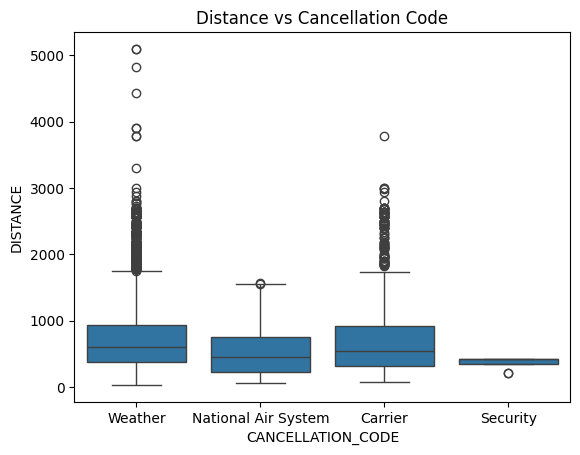

In [37]:
sb.boxplot(data=df,x="CANCELLATION_CODE",y="DISTANCE");
plt.title("Distance vs Cancellation Code");